## Load Data

In [3]:
import numpy as np
import pandas as pd
import matplotlib as mpl
mpl.rcParams['agg.path.chunksize'] = 10000
import matplotlib.pyplot as plt

inner_race_df = pd.read_csv('../data/set1_b3_inner_race_defect.csv')
roller_element_df = pd.read_csv('../data/set1_b4_roller_element_defect.csv')
outer_race_df = pd.read_csv('../data/set2_b1_outer_race_failure.csv')
outer_race2_df = pd.read_csv('../data/set3_b3_outer_race_failure.csv')
normal_df = pd.read_csv('../data/set2_original.csv')

In [4]:
inner_race_df

,Unnamed: 0,B3_1
0,0,-0.049
1,1,-0.005
2,2,-0.100
3,3,-0.151
4,4,0.046
...,...,...
44152719,20474,0.117
44152720,20475,-0.266
44152721,20476,-0.112
44152722,20477,0.813


In [5]:
inner_race = inner_race_df['B3_1']
roller_element = roller_element_df['B4_1']
outer_race = outer_race_df['B1']
outer_race2 = outer_race2_df['B3']
normal = normal_df['B2']

## Time Domain 

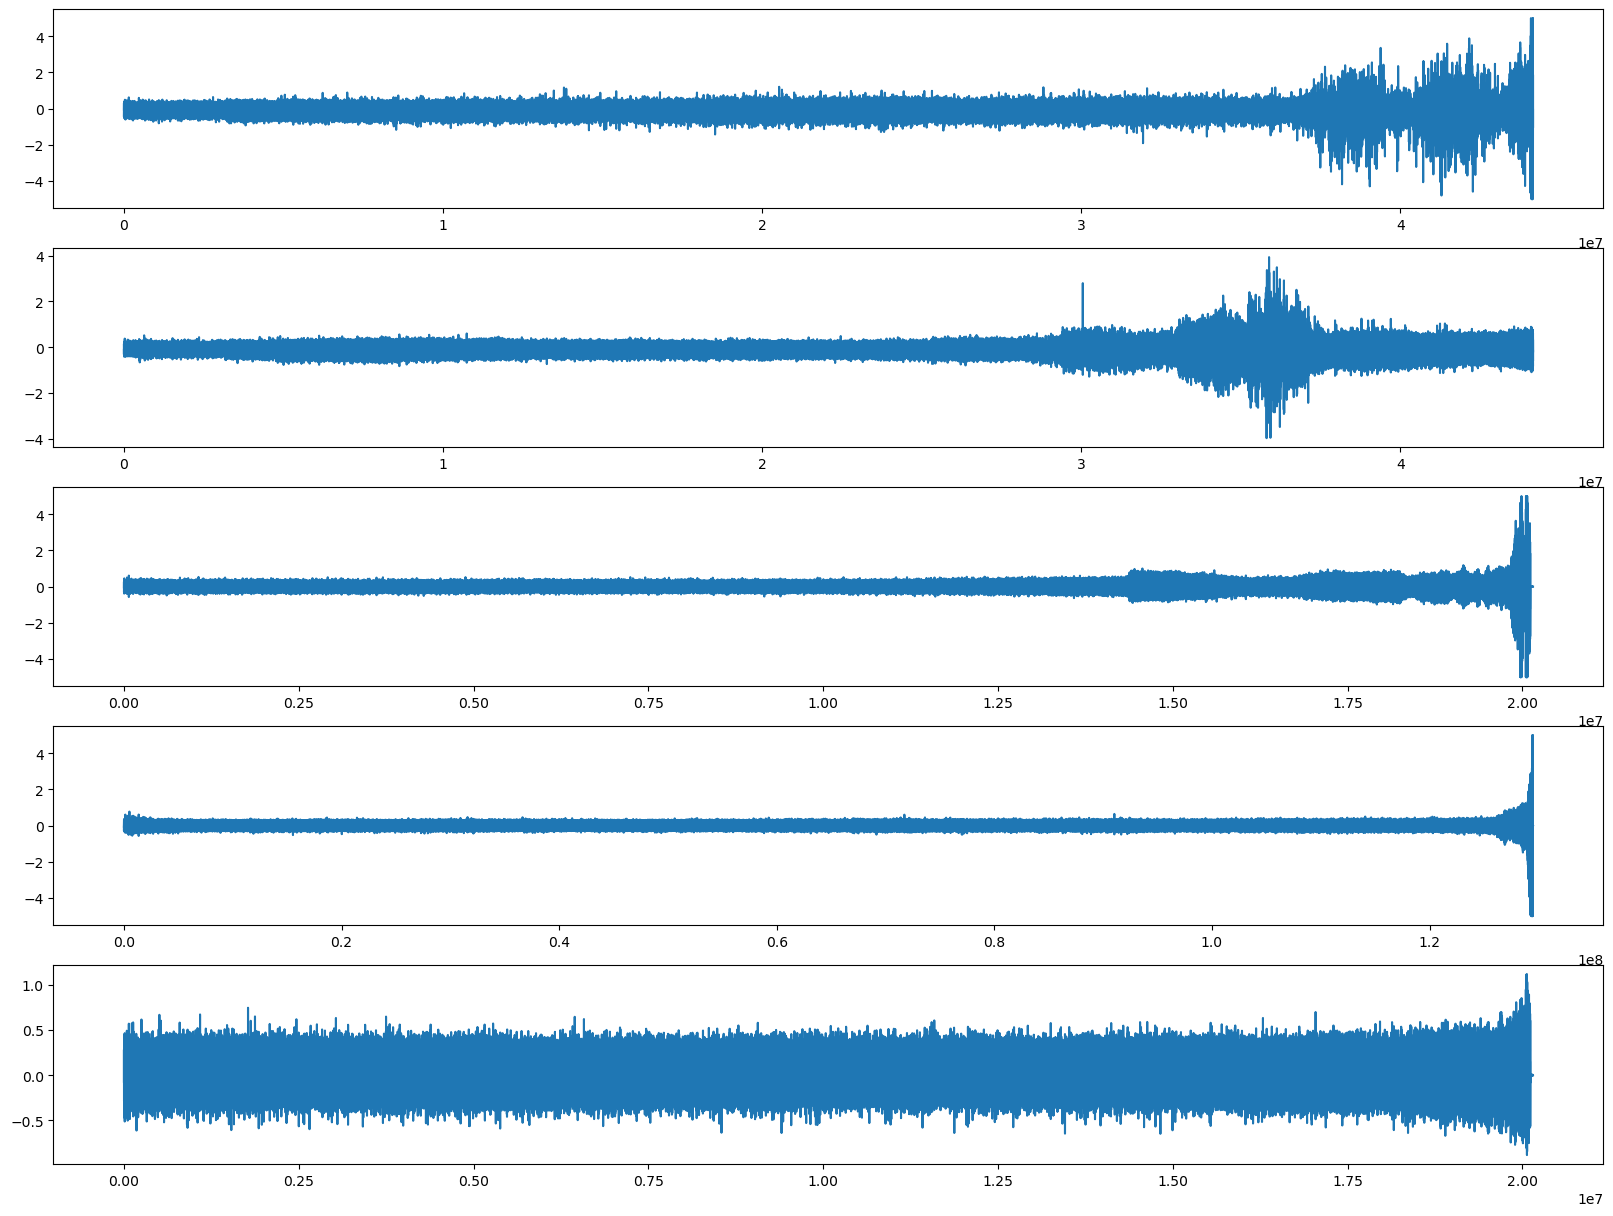

In [6]:
plt.figure(figsize=[20, 15])
# inner race defect
plt.subplot(5, 1, 1)
plt.plot(inner_race)
# roller element defect
plt.subplot(5, 1, 2)
plt.plot(roller_element)
# outer race failure 1
plt.subplot(5, 1, 3)
plt.plot(outer_race)
# outer race failure 2
plt.subplot(5, 1, 4)
plt.plot(outer_race2)
# normal
plt.subplot(5, 1, 5)
plt.plot(normal)
plt.show()

## FFT

### inner race

In [7]:
n = len(inner_race)
k = np.arange(n)
Fs = 20480
T = n/Fs
inner_frequency = k / T
inner_frequency = inner_frequency[range(int(n/2))]

inner_fft_data = np.fft.fft(inner_race) / n
inner_fft_data = inner_fft_data[range(int(n / 2))]

### roller element

In [8]:
n = len(roller_element)
k = np.arange(n)
Fs = 20480
T = n/Fs
roller_frequency = k / T
roller_frequency = roller_frequency[range(int(n/2))]

roller_fft_data = np.fft.fft(roller_element) / n
roller_fft_data = roller_fft_data[range(int(n / 2))]

### outer race

In [9]:
n = len(outer_race)
k = np.arange(n)
Fs = 20480
T = n/Fs
outer_frequency = k / T
outer_frequency = outer_frequency[range(int(n/2))]

outer_fft_data = np.fft.fft(outer_race) / n
outer_fft_data = outer_fft_data[range(int(n / 2))]

### outer race 2

In [10]:
n = len(outer_race2)
k = np.arange(n)
Fs = 20480
T = n/Fs
outer_frequency2 = k / T
outer_frequency2 = outer_frequency2[range(int(n/2))]

outer_fft_data2 = np.fft.fft(outer_race2) / n
outer_fft_data2 = outer_fft_data2[range(int(n / 2))]

### normal

In [28]:
n = len(normal)
k = np.arange(n)
Fs = 20480
T = n/Fs
frequency = k / T
frequency = frequency[range(int(n/2))]

fft_data = np.fft.fft(normal) / n
fft_data = fft_data[range(int(n / 2))]

### Dataset 2 - Entire FFT

In [26]:
n = len(normal_df['B4'])
k = np.arange(n)
Fs = 20480
T = n/Fs
frequency2 = k / T
frequency2 = frequency2[range(int(n/2))]

fft_data2 = np.fft.fft(normal_df['B4']) / n
fft_data2 = fft_data2[range(int(n / 2))]

In [35]:
n = len(normal_df['B3'])
k = np.arange(n)
Fs = 20480
T = n/Fs
frequency3 = k / T
frequency3 = frequency3[range(int(n/2))]

fft_data3 = np.fft.fft(normal_df['B3']) / n
fft_data3 = fft_data3[range(int(n / 2))]

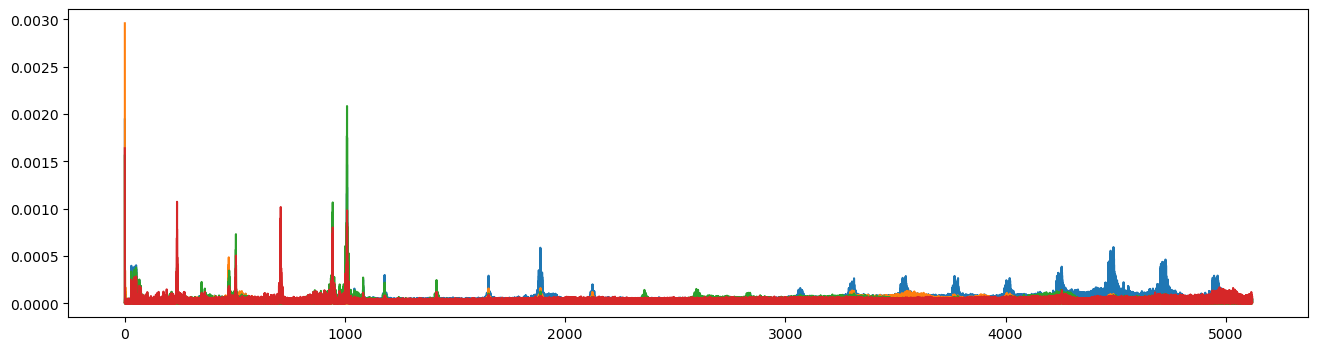

In [37]:
plt.figure(figsize=[16,4])
plt.plot(outer_frequency[:len(outer_frequency)//2], np.abs(outer_fft_data)[:len(outer_fft_data)//2])
plt.plot(frequency2[:len(frequency2)//2], np.abs(fft_data2)[:len(fft_data2)//2])
plt.plot(frequency[:len(frequency)//2], np.abs(fft_data)[:len(fft_data)//2])
plt.plot(frequency3[:len(frequency3)//2], np.abs(fft_data3)[:len(fft_data3)//2])

### Visualization

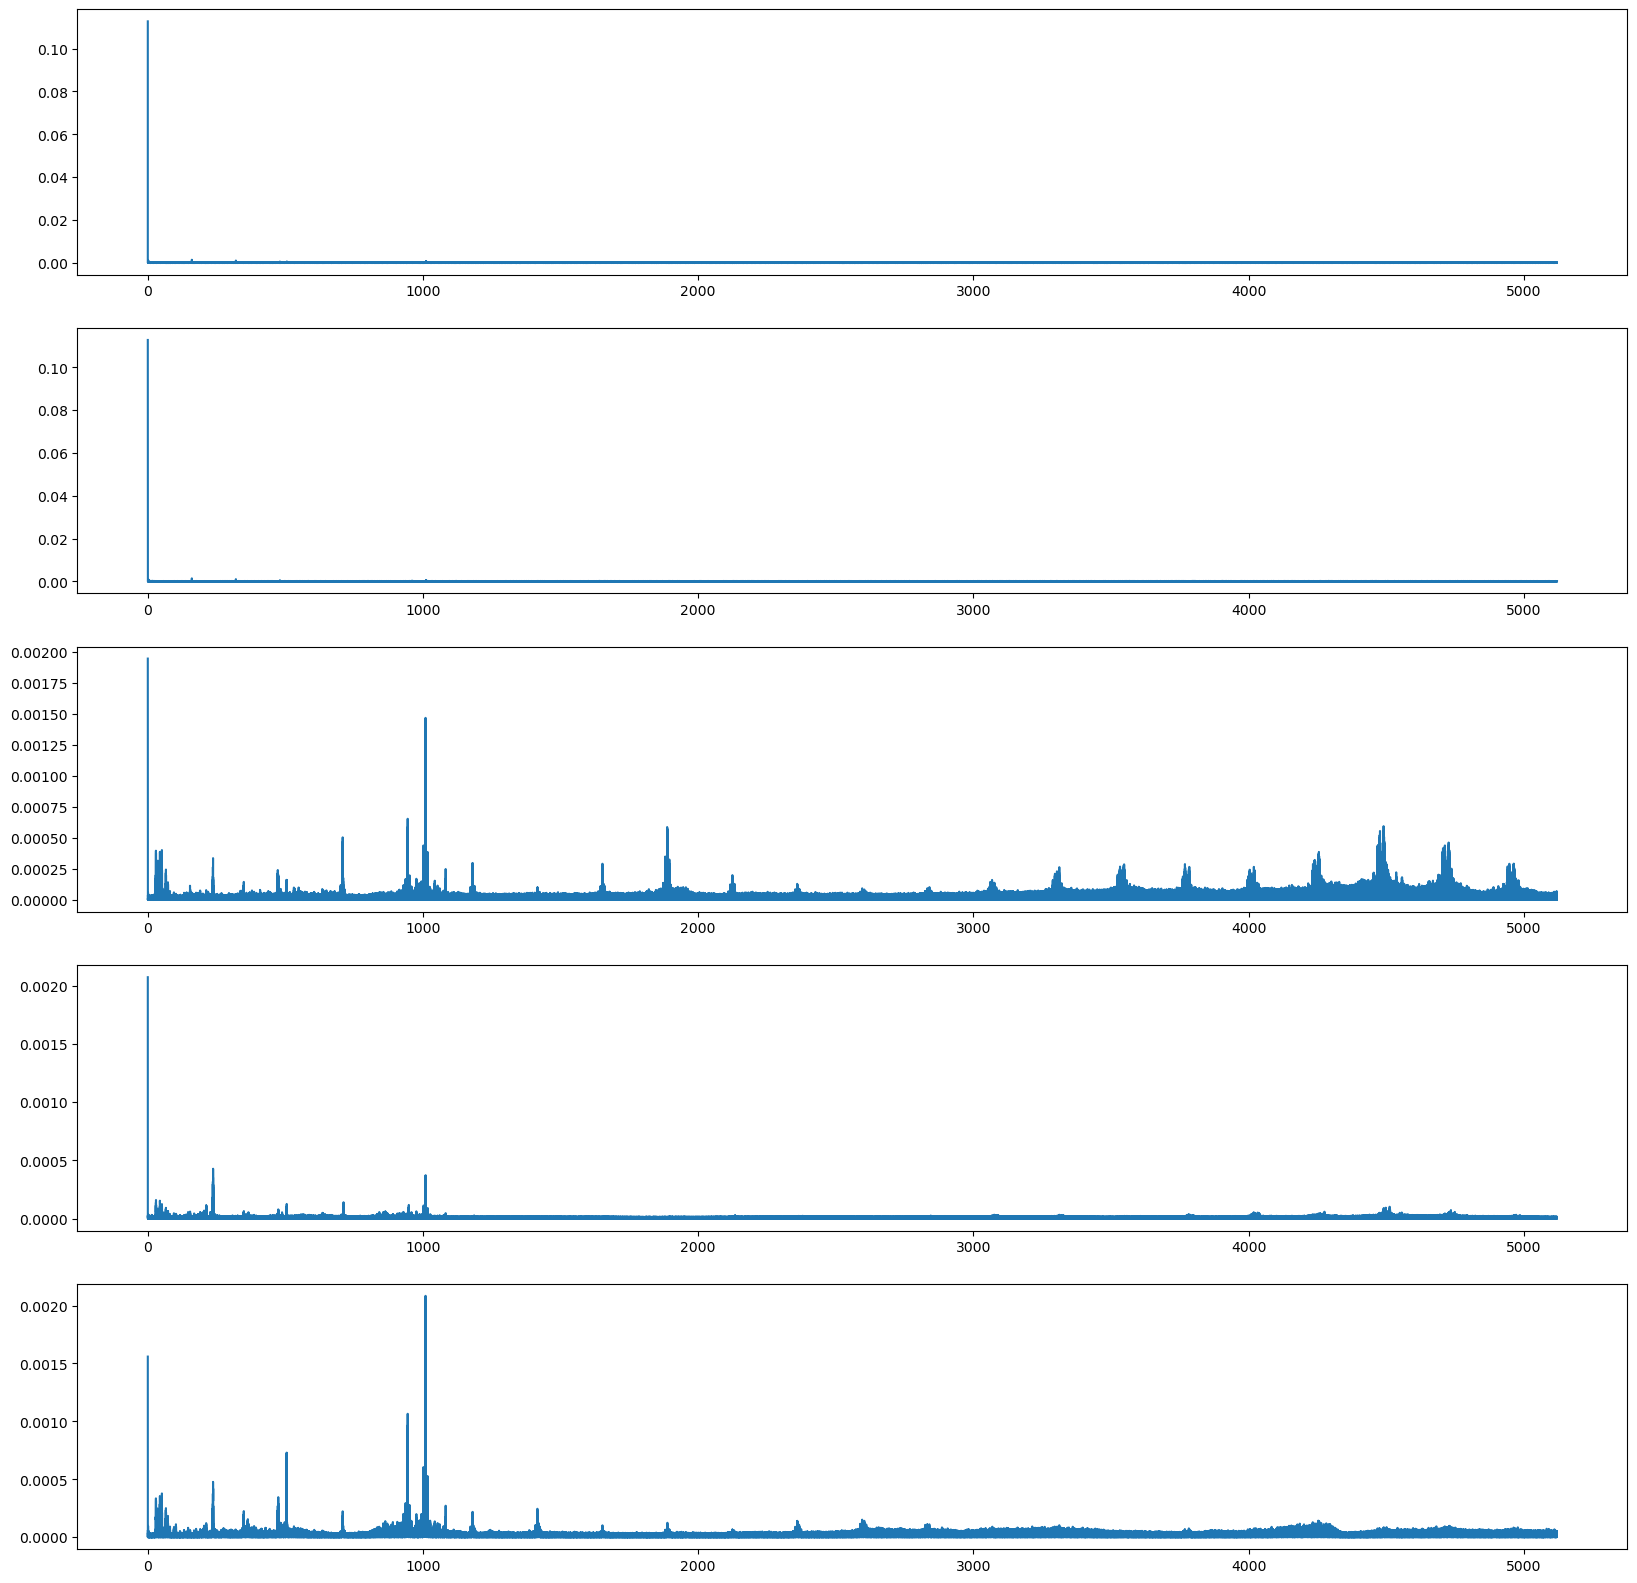

In [12]:
plt.figure(figsize=[20, 20])
# inner race defect
plt.subplot(5, 1, 1)
plt.plot(inner_frequency[:len(inner_frequency)//2], np.abs(inner_fft_data)[:len(inner_frequency)//2])
# roller element defect
plt.subplot(5, 1, 2)
plt.plot(roller_frequency[:len(roller_frequency)//2], np.abs(roller_fft_data)[:len(roller_fft_data)//2])
# outer race failure
plt.subplot(5, 1, 3)
plt.plot(outer_frequency[:len(outer_frequency)//2], np.abs(outer_fft_data)[:len(outer_fft_data)//2])
# outer race failure2
plt.subplot(5, 1, 4)
plt.plot(outer_frequency2[:len(outer_frequency2)//2], np.abs(outer_fft_data2)[:len(outer_fft_data2)//2])
# normal
plt.subplot(5, 1, 5)
plt.plot(frequency[:len(frequency)//2], np.abs(fft_data)[:len(fft_data)//2])
plt.show()

## STFT

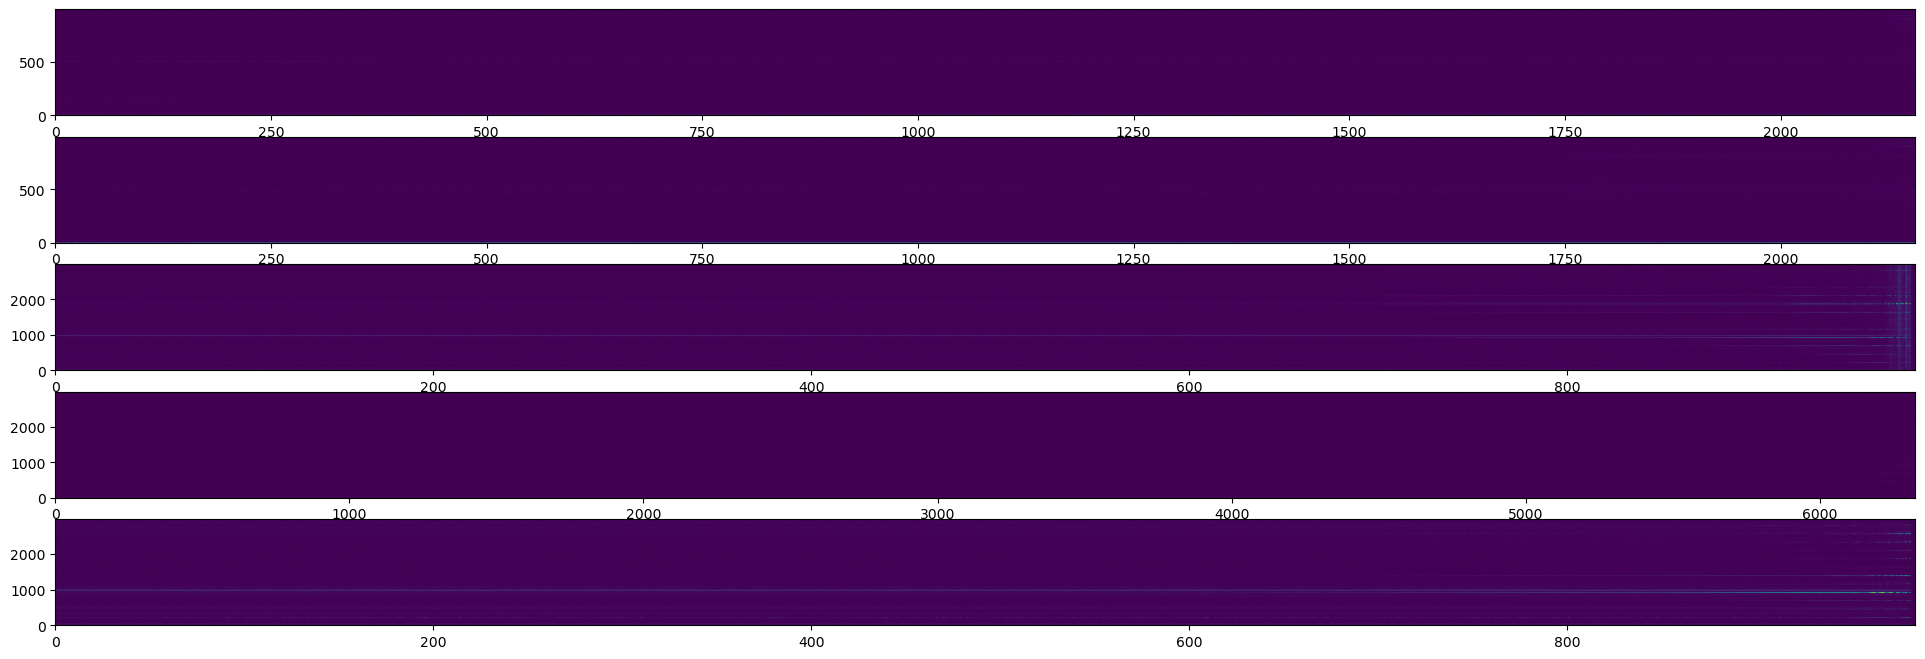

In [20]:
from scipy import signal
import matplotlib.gridspec as gridspec

gs = gridspec.GridSpec(5, 1)
fig = plt.figure(figsize=(24, 8))

inner_stft = plt.subplot(gs[0, 0])
roller_stft = plt.subplot(gs[1, 0])
outer_stft = plt.subplot(gs[2, 0])
outer2_stft = plt.subplot(gs[3, 0])
normal_stft = plt.subplot(gs[4, 0])

f, t, Zxx = signal.stft(inner_race, 20480, nperseg=2048)
inner_stft.pcolormesh(t, f[:100], np.abs(Zxx[:100]), shading="gouraud")

f, t, Zxx = signal.stft(roller_element, 20480, nperseg=2048)
roller_stft.pcolormesh(t, f[:100], np.abs(Zxx[:100]), shading="gouraud")

f, t, Zxx = signal.stft(outer_race, 20480, nperseg=2048)
outer_stft.pcolormesh(t, f[:300], np.abs(Zxx[:300]), shading="gouraud")

f, t, Zxx = signal.stft(outer_race2, 20480, nperseg=2048)
outer2_stft.pcolormesh(t, f[:300], np.abs(Zxx[:300]), shading="gouraud")

f, t, Zxx = signal.stft(normal, 20480, nperseg=2048)
normal_stft.pcolormesh(t, f[:300], np.abs(Zxx[:300]), shading="gouraud")

plt.show()